In [1]:
import tensorflow

C:\Users\hiroa\Anaconda3\envs\py27\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import keras

Using TensorFlow backend.


In [6]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping
import pandas as pd, numpy as np

# BMIのデータを読み込んで正規化する --- (※1)
csv = pd.read_csv("C:/Users/hiroa/Keras_test/bmi.csv")
# 体重と身長のデータ
csv["weight"] /= 100
csv["height"] /= 200
X = csv[["weight", "height"]].as_matrix() # --- (*1a)
# ラベル
bclass = {"thin":[1,0,0], "normal":[0,1,0], "fat":[0,0,1]}
y = np.empty((20000,3))
for i, v in enumerate(csv["label"]):
    y[i] = bclass[v]
# 訓練データとテストデータを分ける --- (※2)
X_train, y_train = X[1:15001], y[1:15001]
X_test,  y_test  = X[15001:20001], y[15001:20001] 


# モデルの構造を定義 --- (※3)
model = Sequential()
model.add(Dense(512, input_shape=(2,)))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(3))
model.add(Activation('softmax'))

# モデルを構築 --- (※4)
model.compile(
    loss='categorical_crossentropy',
    optimizer="rmsprop",
    metrics=['accuracy'])

# データで訓練 --- (※5)
hist = model.fit(
    X_train, y_train,
    batch_size=100,
    #nb_epoch=20,
    epochs=20,
    validation_split=0.1,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10)],
    verbose=1)

# テストデータを用いて評価する --- (※6)
score = model.evaluate(X_test, y_test)
print('loss=', score[0])
print('accuracy=', score[1])

C:\Users\hiroa\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


Train on 13500 samples, validate on 1500 samples
Epoch 1/20
13500/13500 [==============================] - 1s 102us/step - loss: 0.5058 - acc: 0.7990 - val_loss: 0.3544 - val_acc: 0.8413
Epoch 2/20
13500/13500 [==============================] - 1s 87us/step - loss: 0.2510 - acc: 0.8999 - val_loss: 0.2689 - val_acc: 0.8593
Epoch 3/20
13500/13500 [==============================] - 1s 89us/step - loss: 0.1909 - acc: 0.9164 - val_loss: 0.1203 - val_acc: 0.9647
Epoch 4/20
13500/13500 [==============================] - 1s 85us/step - loss: 0.1628 - acc: 0.9319 - val_loss: 0.1064 - val_acc: 0.9640
Epoch 5/20
13500/13500 [==============================] - 1s 89us/step - loss: 0.1555 - acc: 0.9307 - val_loss: 0.1106 - val_acc: 0.9520
Epoch 6/20
13500/13500 [==============================] - 1s 87us/step - loss: 0.1455 - acc: 0.9368 - val_loss: 0.0819 - val_acc: 0.9733
Epoch 7/20
13500/13500 [==============================] - 1s 90us/step - loss: 0.1347 - acc: 0.9386 - val_loss: 0.2150 - val_acc

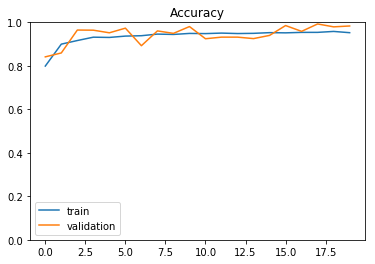

In [9]:
import numpy as np
import matplotlib.pyplot as plt

epoch = np.arange(len(hist.history['acc']))

# accuracy と validation accuracy の推移をプロットする
plt.title('Accuracy')
plt.ylim(0.0, 1.0)
plt.plot(epoch, hist.history['acc'], label='train')
plt.plot(epoch, hist.history['val_acc'], label='validation')
plt.legend()
plt.show()

In [10]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 5
#epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 153s 3ms/step - loss: 0.2721 - acc: 0.9170 - val_loss: 0.0598 - val_acc: 0.9807
Epoch 2/5
60000/60000 [==============================] - 154s 3ms/step - loss: 0.0934 - acc: 0.9722 - val_loss: 0.0423 - val_acc: 0.9857
Epoch 3/5
60000/60000 [==============================] - 148s 2ms/step - loss: 0.0692 - acc: 0.9788 - val_loss: 0.0374 - val_acc: 0.9877
Epoch 4/5
60000/60000 [==============================] - 151s 3ms/step - loss: 0.0566 - acc: 0.9837 - val_loss: 0.0332 - val_acc: 0.9892
Epoch 5/5
60000/60000 [==============================] - 151s 3ms/step - loss: 0.0489 - acc: 0.9848 - val_loss: 0.0286 - val_acc: 0.9914
Test loss: 0.028602575239149153
Test accuracy: 0.9914
